# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

170500096/170498071 [==============================] - 590s 3us/step


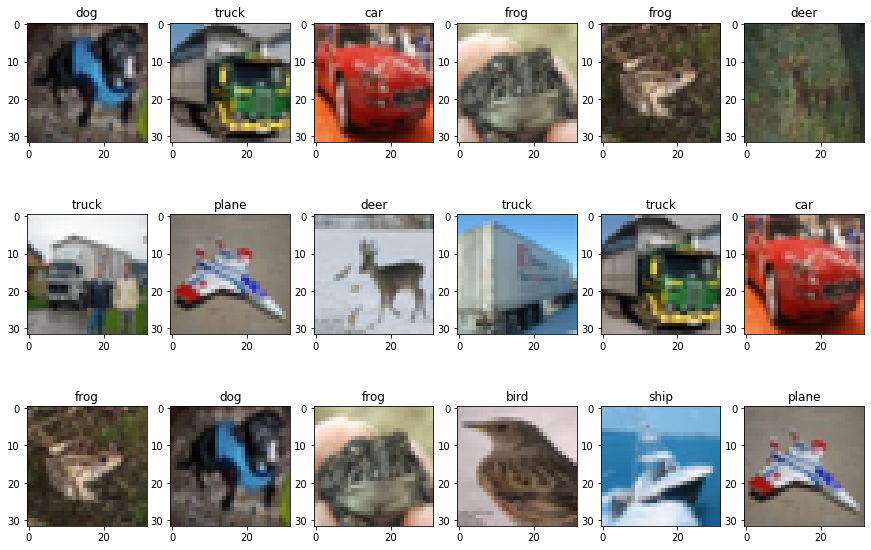

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Counts'))

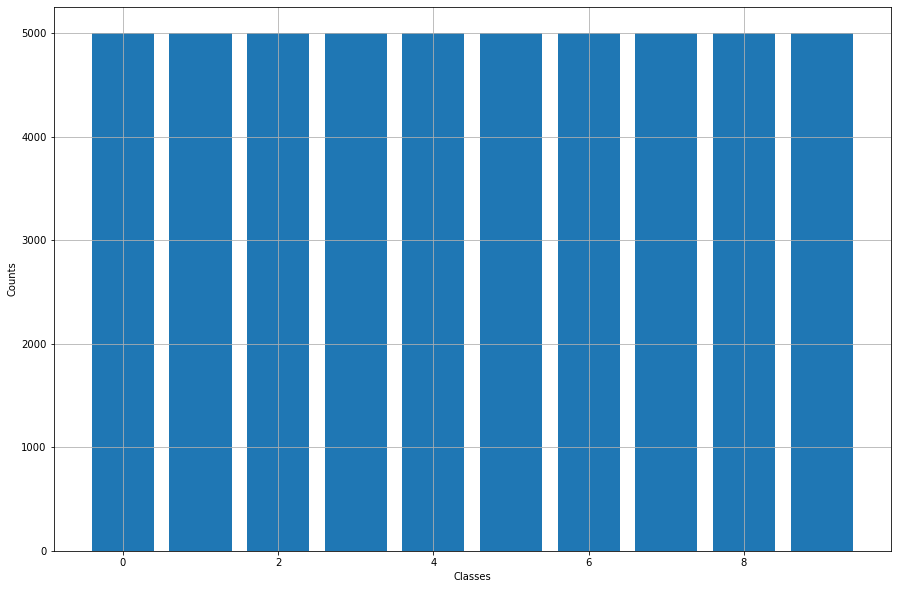

In [58]:
# Compute the class histogram
from collections import Counter
hist = Counter(np.transpose(y_train)[0])

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Classes'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [59]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [62]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1153

### Step 3: Training

Compile the model and train it.

In [63]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 26s 71ms/step - loss: 1.7368 - accuracy: 0.3808 - val_loss: 1.5628 - val_accuracy: 0.4526
Epoch 2/25
352/352 [==============================] - 23s 66ms/step - loss: 1.4208 - accuracy: 0.5015 - val_loss: 1.3457 - val_accuracy: 0.5244
Epoch 3/25
352/352 [==============================] - 21s 59ms/step - loss: 1.3068 - accuracy: 0.5424 - val_loss: 1.2545 - val_accuracy: 0.5624
Epoch 4/25
352/352 [==============================] - 21s 60ms/step - loss: 1.2349 - accuracy: 0.5703 - val_loss: 1.1935 - val_accuracy: 0.5802
Epoch 5/25
352/352 [==============================] - 25s 72ms/step - loss: 1.1853 - accuracy: 0.5894 - val_loss: 1.1541 - val_accuracy: 0.5988
Epoch 6/25
352/352 [==============================] - 20s 57ms/step - loss: 1.1390 - accuracy: 0.6045 - val_loss: 1.1110 - val_accuracy: 0.6160
Epoch 7/25
352/352 [==============================] - 20s 56ms/step - loss: 1.1056 - accuracy: 0.6162 - val_loss: 1.1101 - val_accuracy:

Train Acc      0.7109110951423645
Validation Acc 0.6751999855041504


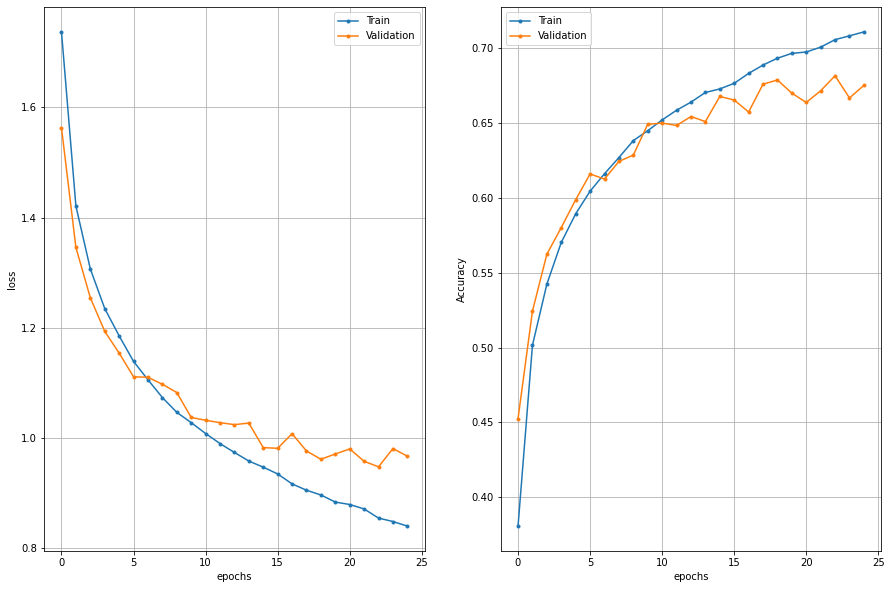

In [64]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [65]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

In [69]:
y_pred=np.argmax(y_pred, axis=1)

In [70]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    
    total = np.sum(mask)
    
    acc = tp/total
    print(class_name, acc)

plane 0.755
car 0.838
bird 0.581
cat 0.473
deer 0.515
dog 0.609
frog 0.697
horse 0.765
ship 0.692
truck 0.713


In [71]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.9841 - accuracy: 0.6638
Test loss   0.9841051697731018
Test metric 0.6638000011444092


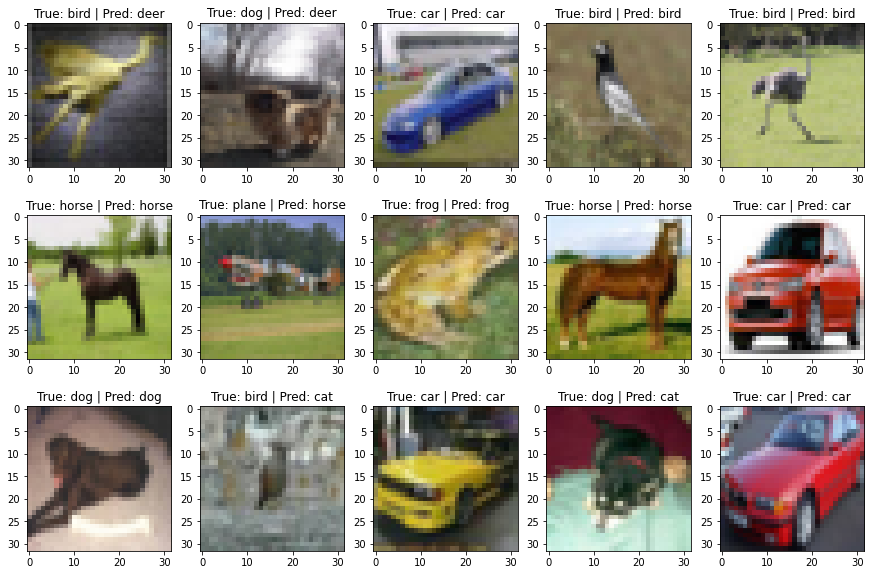

In [72]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

1. accuracy: 0.6638
2. Для улучшения baseline я бы попробовала добавить больше сверточных слоев согласно архитектуры VGG, добавить слои Dropout, настроить регуляризацию learning rate, попробовать увеличить кол-во эпох, добавить кол-во samples.
3. Попробуем добавить еще один слой свертки 64

In [73]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0   

In [74]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 26s 72ms/step - loss: 1.8031 - accuracy: 0.3465 - val_loss: 1.5852 - val_accuracy: 0.4246
Epoch 2/25
352/352 [==============================] - 24s 67ms/step - loss: 1.4885 - accuracy: 0.4675 - val_loss: 1.4553 - val_accuracy: 0.4738
Epoch 3/25
352/352 [==============================] - 22s 62ms/step - loss: 1.3801 - accuracy: 0.5090 - val_loss: 1.3373 - val_accuracy: 0.5206
Epoch 4/25
352/352 [==============================] - 20s 57ms/step - loss: 1.2949 - accuracy: 0.5440 - val_loss: 1.2538 - val_accuracy: 0.5620
Epoch 5/25
352/352 [==============================] - 21s 58ms/step - loss: 1.2303 - accuracy: 0.5665 - val_loss: 1.1927 - val_accuracy: 0.5832
Epoch 6/25
352/352 [==============================] - 25s 71ms/step - loss: 1.1752 - accuracy: 0.5877 - val_loss: 1.1629 - val_accuracy: 0.5904
Epoch 7/25
352/352 [==============================] - 22s 63ms/step - loss: 1.1304 - accuracy: 0.6063 - val_loss: 1.1449 - val_accuracy:

Train Acc      0.7269555330276489
Validation Acc 0.6547999978065491


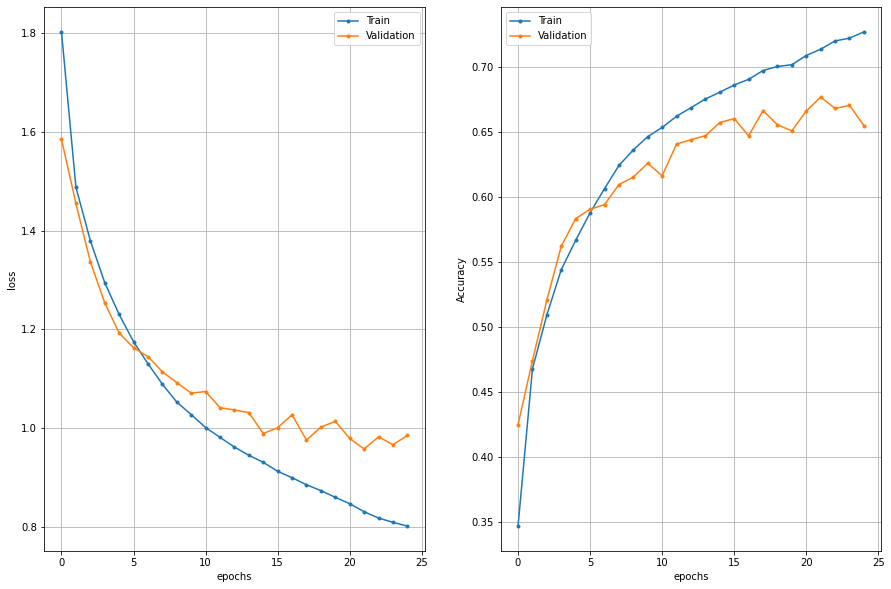

In [75]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

In [76]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

In [77]:
y_pred=np.argmax(y_pred, axis=1)

In [78]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    
    total = np.sum(mask)
    
    acc = tp/total
    print(class_name, acc)

plane 0.709
car 0.799
bird 0.683
cat 0.504
deer 0.512
dog 0.634
frog 0.705
horse 0.716
ship 0.637
truck 0.737


In [79]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.9911 - accuracy: 0.6636
Test loss   0.9911462068557739
Test metric 0.6636000275611877


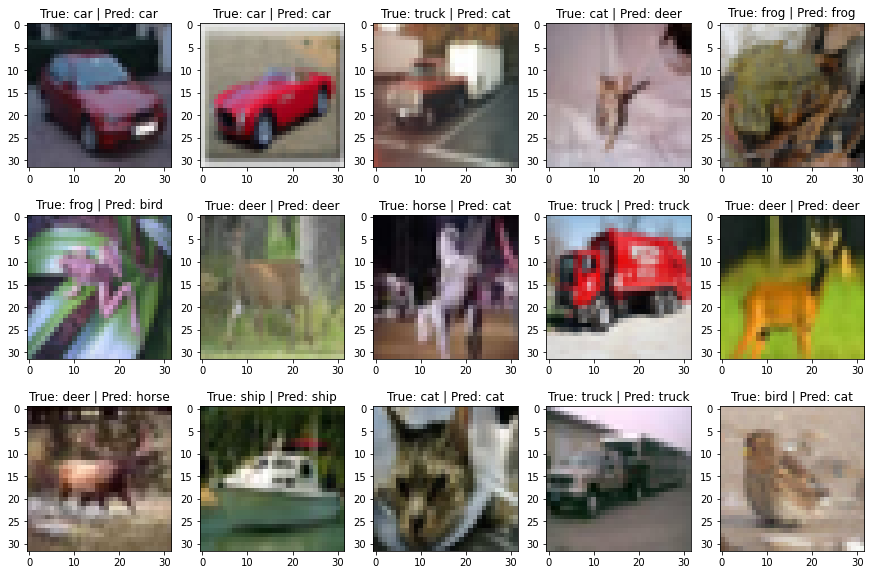

In [80]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))